# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/sjvasconcello/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Gather Data

In [2]:
boston_dataset = load_boston()
type(boston_dataset)

sklearn.utils.Bunch

In [3]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
type(boston_dataset.data)

numpy.ndarray

In [6]:
boston_dataset.data.shape

(506, 13)

## Data exploration with Pandas Dataframes

In [7]:
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
data["PRICE"] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

### Cleaning data - check for missing values

In [9]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

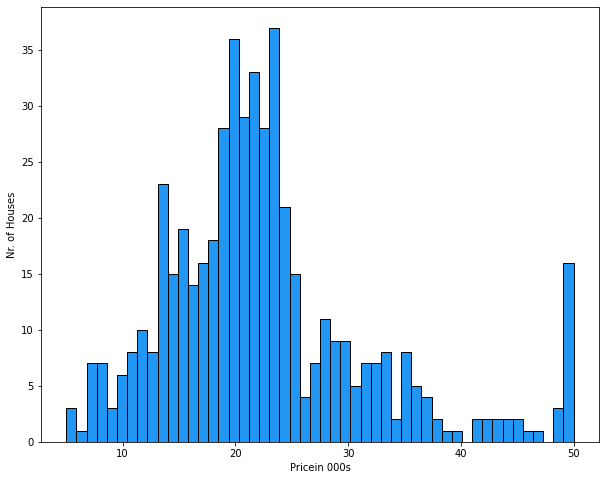

In [11]:
plt.figure(figsize=(10,8))
plt.hist(data["PRICE"],bins=50, ec="black", color="#2196f3")
plt.xlabel("Pricein 000s")
plt.ylabel("Nr. of Houses")
plt.show()

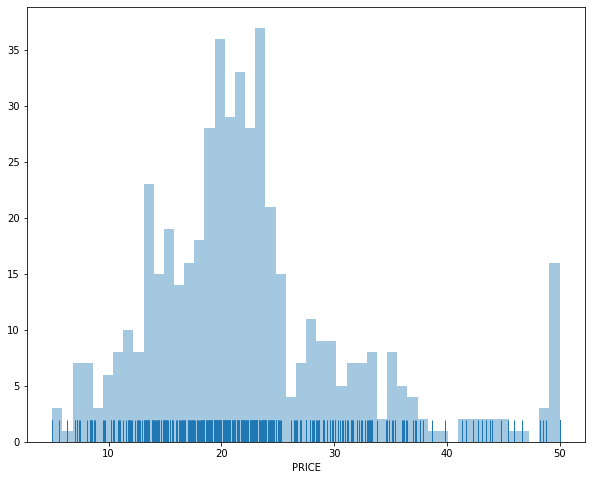

In [12]:
plt.figure(figsize=(10,8))
sns.distplot(data["PRICE"],bins=50,rug=True, hist=True, kde=False)
plt.show()

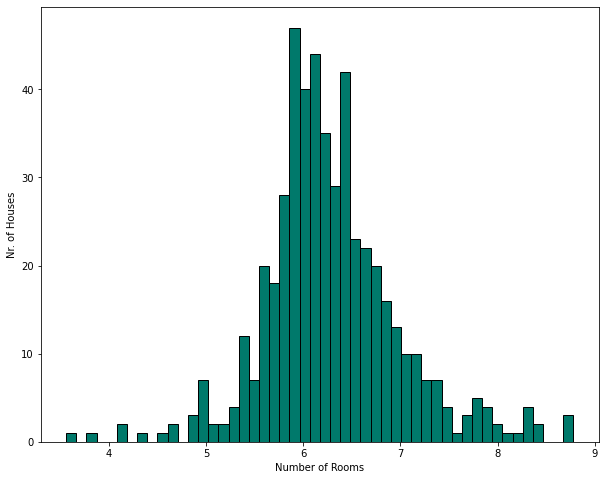

In [13]:
plt.figure(figsize=(10,8))
plt.hist(data["RM"],bins=50, ec="black", color="#00796b")
plt.xlabel("Number of Rooms")
plt.ylabel("Nr. of Houses")
plt.show()

In [14]:
data["RM"].mean()

6.284634387351787

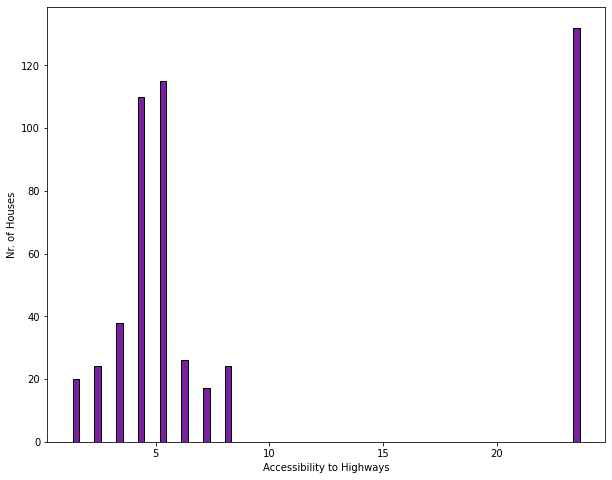

In [39]:
plt.figure(figsize=(10,8))
plt.hist(data["RAD"],bins=24, ec="black", color="#7b1fa2", rwidth=0.3)
plt.xlabel("Accessibility to Highways")
plt.ylabel("Nr. of Houses")
plt.show()

In [26]:
data["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

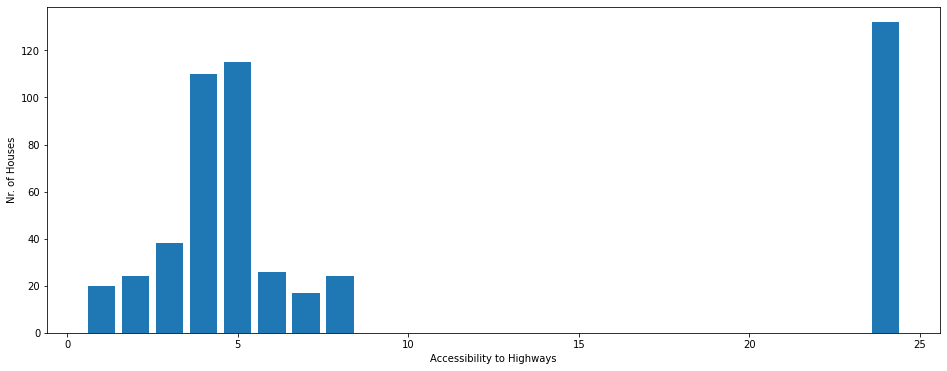

In [38]:
frequency = data["RAD"].value_counts()
plt.figure(figsize=(16,6))
plt.bar(frequency.index, height=frequency)
plt.xlabel("Accessibility to Highways")
plt.ylabel("Nr. of Houses")
plt.show()

In [40]:
data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### Descriptive Statistics

In [41]:
data["PRICE"].min()

5.0

In [43]:
data["PRICE"].max()

50.0

In [45]:
data["PRICE"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64